In [1]:
%load_ext autoreload
%autoreload 2


import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'


In [2]:
import logging
logging.getLogger().setLevel(logging.DEBUG)

In [3]:
from torchsummary import summary
import torch
use_cuda=torch.cuda.is_available()
import pytorch
from pytorch import dataset as ptd

import os
import datasets
import pytorch_models
import torch.optim as optim
dataset_name="cifar10"
(x_train, y_train), (x_test, y_test), input_shape,num_classes = datasets.get_data(dataset_name)
dataset=ptd.ClassificationDataset(dataset_name,x_train,x_test,y_train,y_test,num_classes,input_shape)

print('x_train shape:', x_train.shape,x_train.dtype)
print('x_test shape:', x_test.shape,x_test.dtype)
print('y_train shape:', y_train.shape,y_train.dtype)
print('y_test shape:', y_test.shape,y_test.dtype)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


import numpy as np
print(np.unique(y_train.argmax(axis=1)))
print(y_train.min(),y_train.max())


Using TensorFlow backend.
/home/facundo/.python/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


x_train shape: (50000, 32, 32, 3) uint8
x_test shape: (10000, 32, 32, 3) uint8
y_train shape: (50000, 10) float64
y_test shape: (10000, 10) float64
50000 train samples
10000 test samples
[0 1 2 3 4 5 6 7 8 9]
0.0 1.0


In [4]:
from pytorch import training

import pytorch_models

conv_filters={"mnist":32,"mnist_rot":32,"cifar10":64}
fc_filters={"mnist":64,"mnist_rot":64,"cifar10":128}
model = pytorch_models.SimpleConv(input_shape,num_classes,
                                 conv_filters=conv_filters[dataset.name],fc_filters=fc_filters[dataset.name])
#model= pytorch_models.FFNet(input_shape,num_classes)x
if use_cuda:
    model=model.cuda()
parameters=training.add_weight_decay(model.named_parameters(),1e-9)
optimizer = optim.Adam(parameters, lr=0.001)
print(model)

rotated_model= pytorch_models.SimpleConv(input_shape,num_classes,
                                       conv_filters=conv_filters[dataset.name],fc_filters=fc_filters[dataset.name])
if use_cuda:
    rotated_model= rotated_model.cuda()
rotated_parameters=training.add_weight_decay(rotated_model.named_parameters(),1e-9)
rotated_optimizer = optim.Adam(rotated_parameters, lr=0.001)

print(rotated_model)
#summary(model, input_size=[1,28,28])


SimpleConv(
  (conv): SequentialWithIntermediates(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
  )
  (fc): SequentialWithIntermediates(
    (0): Linear(in_features=16384, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)
SimpleConv(
  (conv): SequentialWithIntermediates(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1)

Training model with unrotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:    1.4, accuracy:  0.492, Time:  0:00:06


Test => Loss: 1.0025, Accuracy: 64.29% (6429/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:   0.85, accuracy:  0.701, Time:  0:00:07


Test => Loss: 0.8092, Accuracy: 71.34% (7134/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:  0.647, accuracy:  0.775, Time:  0:00:12


Test => Loss: 0.7139, Accuracy: 75.48% (7548/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:  0.504, accuracy:  0.824, Time:  0:00:12


Test => Loss: 0.6836, Accuracy: 76.76% (7676/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:  0.382, accuracy:  0.866, Time:  0:00:12


Test => Loss: 0.7733, Accuracy: 76.27% (7627/10000)


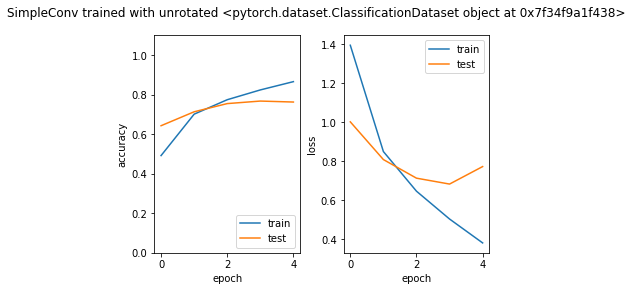

Skipping pretraining rotated model with unrotated dataset
Training rotated model with rotated dataset...


Epoch 1: 100% (batch 782/782)  ==stats==> loss:    1.9, accuracy:  0.286, Time:  0:00:12


Test => Loss: 1.7666, Accuracy: 34.45% (3445/10000)


Epoch 2: 100% (batch 782/782)  ==stats==> loss:   1.65, accuracy:  0.396, Time:  0:00:12


Test => Loss: 1.5363, Accuracy: 44.60% (4460/10000)


Epoch 3: 100% (batch 782/782)  ==stats==> loss:   1.51, accuracy:  0.451, Time:  0:00:12


Test => Loss: 1.4500, Accuracy: 48.29% (4829/10000)


Epoch 4: 100% (batch 782/782)  ==stats==> loss:   1.41, accuracy:  0.491, Time:  0:00:12


Test => Loss: 1.3823, Accuracy: 50.35% (5035/10000)


Epoch 5: 100% (batch 782/782)  ==stats==> loss:   1.33, accuracy:  0.519, Time:  0:00:12


Test => Loss: 1.3279, Accuracy: 52.57% (5257/10000)


Epoch 6: 100% (batch 782/782)  ==stats==> loss:   1.27, accuracy:  0.545, Time:  0:00:12


Test => Loss: 1.2451, Accuracy: 54.94% (5494/10000)


Epoch 7: 100% (batch 782/782)  ==stats==> loss:   1.22, accuracy:  0.563, Time:  0:00:12


Test => Loss: 1.2178, Accuracy: 56.39% (5639/10000)


Epoch 8: 100% (batch 782/782)  ==stats==> loss:   1.18, accuracy:  0.579, Time:  0:00:12


Test => Loss: 1.1686, Accuracy: 58.56% (5856/10000)


Epoch 9: 100% (batch 782/782)  ==stats==> loss:   1.15, accuracy:  0.591, Time:  0:00:12


Test => Loss: 1.1689, Accuracy: 58.18% (5818/10000)


Epoch 10: 100% (batch 782/782)  ==stats==> loss:   1.12, accuracy:  0.599, Time:  0:00:12


Test => Loss: 1.1113, Accuracy: 60.65% (6065/10000)


Epoch 11: 100% (batch 782/782)  ==stats==> loss:   1.09, accuracy:  0.613, Time:  0:00:12


Test => Loss: 1.1167, Accuracy: 60.09% (6009/10000)


Epoch 12: 100% (batch 782/782)  ==stats==> loss:   1.07, accuracy:  0.618, Time:  0:00:12


Test => Loss: 1.0818, Accuracy: 61.99% (6199/10000)


Epoch 13: 100% (batch 782/782)  ==stats==> loss:   1.05, accuracy:  0.626, Time:  0:00:12


Test => Loss: 1.1006, Accuracy: 61.80% (6180/10000)


Epoch 14: 100% (batch 782/782)  ==stats==> loss:   1.03, accuracy:  0.633, Time:  0:00:12


Test => Loss: 1.0816, Accuracy: 62.02% (6202/10000)


Epoch 15: 100% (batch 782/782)  ==stats==> loss:   1.02, accuracy:  0.638, Time:  0:00:12


Test => Loss: 1.0567, Accuracy: 63.38% (6338/10000)


Epoch 16: 100% (batch 782/782)  ==stats==> loss:      1, accuracy:  0.645, Time:  0:00:12


Test => Loss: 1.0629, Accuracy: 62.57% (6257/10000)


Epoch 17: 100% (batch 782/782)  ==stats==> loss:  0.993, accuracy:  0.652, Time:  0:00:12


Test => Loss: 1.0368, Accuracy: 63.38% (6338/10000)


Epoch 18: 100% (batch 782/782)  ==stats==> loss:   0.98, accuracy:  0.655, Time:  0:00:12


Test => Loss: 1.0291, Accuracy: 64.06% (6406/10000)


Epoch 19: 100% (batch 782/782)  ==stats==> loss:  0.973, accuracy:  0.661, Time:  0:00:12


Test => Loss: 0.9884, Accuracy: 65.56% (6556/10000)


Epoch 20: 100% (batch 782/782)  ==stats==> loss:  0.959, accuracy:  0.662, Time:  0:00:12


Test => Loss: 1.0309, Accuracy: 63.95% (6395/10000)


Epoch 21: 100% (batch 782/782)  ==stats==> loss:  0.947, accuracy:  0.668, Time:  0:00:12


Test => Loss: 1.0076, Accuracy: 64.70% (6470/10000)


Epoch 22: 100% (batch 782/782)  ==stats==> loss:  0.938, accuracy:  0.672, Time:  0:00:12


Test => Loss: 0.9745, Accuracy: 66.18% (6618/10000)


Epoch 23: 100% (batch 782/782)  ==stats==> loss:  0.931, accuracy:  0.673, Time:  0:00:12


Test => Loss: 0.9912, Accuracy: 65.92% (6592/10000)


Epoch 24: 100% (batch 782/782)  ==stats==> loss:  0.922, accuracy:  0.675, Time:  0:00:12


Test => Loss: 0.9845, Accuracy: 66.10% (6610/10000)


Epoch 25: 100% (batch 782/782)  ==stats==> loss:  0.912, accuracy:  0.679, Time:  0:00:12


Test => Loss: 0.9557, Accuracy: 66.78% (6678/10000)


Epoch 26: 100% (batch 782/782)  ==stats==> loss:  0.905, accuracy:  0.684, Time:  0:00:12


Test => Loss: 0.9705, Accuracy: 66.68% (6668/10000)


Epoch 27: 100% (batch 782/782)  ==stats==> loss:  0.897, accuracy:  0.686, Time:  0:00:12


Test => Loss: 0.9746, Accuracy: 66.20% (6620/10000)


Epoch 28: 100% (batch 782/782)  ==stats==> loss:   0.89, accuracy:  0.688, Time:  0:00:12


Test => Loss: 0.9942, Accuracy: 66.01% (6601/10000)


Epoch 29: 100% (batch 782/782)  ==stats==> loss:  0.882, accuracy:  0.692, Time:  0:00:12


Test => Loss: 0.9601, Accuracy: 66.88% (6688/10000)


Epoch 30: 100% (batch 782/782)  ==stats==> loss:  0.873, accuracy:  0.694, Time:  0:00:12


Test => Loss: 0.9488, Accuracy: 67.28% (6728/10000)


Epoch 31: 100% (batch 782/782)  ==stats==> loss:  0.873, accuracy:  0.692, Time:  0:00:12


Test => Loss: 0.9595, Accuracy: 66.79% (6679/10000)


Epoch 32: 100% (batch 782/782)  ==stats==> loss:  0.857, accuracy:  0.701, Time:  0:00:12


Test => Loss: 0.9741, Accuracy: 66.71% (6671/10000)


Epoch 33: 100% (batch 782/782)  ==stats==> loss:  0.858, accuracy:    0.7, Time:  0:00:12


Test => Loss: 0.9327, Accuracy: 68.31% (6831/10000)


Epoch 34: 100% (batch 782/782)  ==stats==> loss:  0.847, accuracy:  0.701, Time:  0:00:12


Test => Loss: 0.9125, Accuracy: 68.88% (6888/10000)


Epoch 35: 100% (batch 782/782)  ==stats==> loss:  0.842, accuracy:  0.706, Time:  0:00:12


Test => Loss: 0.9431, Accuracy: 68.08% (6808/10000)


Epoch 36: 100% (batch 782/782)  ==stats==> loss:  0.841, accuracy:  0.706, Time:  0:00:12


Test => Loss: 0.9141, Accuracy: 68.61% (6861/10000)


Epoch 37: 100% (batch 782/782)  ==stats==> loss:  0.834, accuracy:   0.71, Time:  0:00:12


Test => Loss: 0.9402, Accuracy: 67.90% (6790/10000)


Epoch 38: 100% (batch 782/782)  ==stats==> loss:  0.828, accuracy:   0.71, Time:  0:00:12


Test => Loss: 0.9368, Accuracy: 67.74% (6774/10000)


Epoch 39: 100% (batch 782/782)  ==stats==> loss:  0.815, accuracy:  0.716, Time:  0:00:12


Test => Loss: 0.9418, Accuracy: 67.82% (6782/10000)


Epoch 40: 100% (batch 782/782)  ==stats==> loss:  0.817, accuracy:  0.717, Time:  0:00:12


Test => Loss: 0.9018, Accuracy: 69.06% (6906/10000)


Epoch 41: 100% (batch 782/782)  ==stats==> loss:  0.817, accuracy:  0.713, Time:  0:00:12


Test => Loss: 0.9137, Accuracy: 68.67% (6867/10000)


Epoch 42: 100% (batch 782/782)  ==stats==> loss:  0.816, accuracy:  0.714, Time:  0:00:12


Test => Loss: 0.9279, Accuracy: 68.27% (6827/10000)


Epoch 43: 100% (batch 782/782)  ==stats==> loss:  0.805, accuracy:  0.718, Time:  0:00:12


Test => Loss: 0.9490, Accuracy: 67.26% (6726/10000)


Epoch 44: 100% (batch 782/782)  ==stats==> loss:  0.805, accuracy:  0.721, Time:  0:00:12


Test => Loss: 0.9009, Accuracy: 69.74% (6974/10000)


Epoch 45: 100% (batch 782/782)  ==stats==> loss:  0.792, accuracy:  0.725, Time:  0:00:12


Test => Loss: 0.9308, Accuracy: 68.32% (6832/10000)


Epoch 46: 100% (batch 782/782)  ==stats==> loss:  0.792, accuracy:  0.722, Time:  0:00:12


Test => Loss: 0.9247, Accuracy: 68.61% (6861/10000)


Epoch 47: 100% (batch 782/782)  ==stats==> loss:  0.792, accuracy:  0.722, Time:  0:00:12


Test => Loss: 0.9267, Accuracy: 68.17% (6817/10000)


Epoch 48: 100% (batch 782/782)  ==stats==> loss:  0.783, accuracy:  0.725, Time:  0:00:12


Test => Loss: 0.8901, Accuracy: 69.72% (6972/10000)


Epoch 49: 100% (batch 782/782)  ==stats==> loss:  0.783, accuracy:  0.726, Time:  0:00:12


Test => Loss: 0.9038, Accuracy: 69.06% (6906/10000)


Epoch 50: 100% (batch 782/782)  ==stats==> loss:  0.777, accuracy:  0.728, Time:  0:00:12


Test => Loss: 0.8872, Accuracy: 69.53% (6953/10000)


Epoch 51: 100% (batch 782/782)  ==stats==> loss:  0.776, accuracy:  0.728, Time:  0:00:12


Test => Loss: 0.8974, Accuracy: 69.78% (6978/10000)


Epoch 52: 100% (batch 782/782)  ==stats==> loss:  0.768, accuracy:  0.731, Time:  0:00:12


Test => Loss: 0.8982, Accuracy: 69.73% (6973/10000)


Epoch 53: 100% (batch 782/782)  ==stats==> loss:  0.768, accuracy:  0.733, Time:  0:00:12


Test => Loss: 0.8849, Accuracy: 69.59% (6959/10000)


Epoch 54: 100% (batch 782/782)  ==stats==> loss:  0.767, accuracy:  0.733, Time:  0:00:12


Test => Loss: 0.9202, Accuracy: 69.01% (6901/10000)


Epoch 55: 100% (batch 782/782)  ==stats==> loss:  0.761, accuracy:  0.734, Time:  0:00:12


Test => Loss: 0.8914, Accuracy: 70.04% (7004/10000)


Epoch 56: 100% (batch 782/782)  ==stats==> loss:  0.761, accuracy:  0.735, Time:  0:00:12


Test => Loss: 0.8864, Accuracy: 69.66% (6966/10000)


Epoch 57: 100% (batch 782/782)  ==stats==> loss:  0.756, accuracy:  0.738, Time:  0:00:12


Test => Loss: 0.9275, Accuracy: 69.36% (6936/10000)


Epoch 58: 100% (batch 782/782)  ==stats==> loss:  0.754, accuracy:  0.738, Time:  0:00:12


Test => Loss: 0.9000, Accuracy: 69.89% (6989/10000)


Epoch 59: 100% (batch 782/782)  ==stats==> loss:  0.748, accuracy:  0.741, Time:  0:00:12


Test => Loss: 0.9022, Accuracy: 69.59% (6959/10000)


Epoch 60: 100% (batch 782/782)  ==stats==> loss:  0.751, accuracy:   0.74, Time:  0:00:12


Test => Loss: 0.8669, Accuracy: 70.43% (7043/10000)


Epoch 61: 100% (batch 782/782)  ==stats==> loss:  0.747, accuracy:   0.74, Time:  0:00:12


Test => Loss: 0.8879, Accuracy: 69.45% (6945/10000)


Epoch 62: 100% (batch 782/782)  ==stats==> loss:  0.736, accuracy:  0.744, Time:  0:00:12


Test => Loss: 0.8822, Accuracy: 70.20% (7020/10000)


Epoch 63: 100% (batch 782/782)  ==stats==> loss:  0.738, accuracy:  0.744, Time:  0:00:12


Test => Loss: 0.9036, Accuracy: 70.14% (7014/10000)


Epoch 64: 100% (batch 782/782)  ==stats==> loss:  0.738, accuracy:  0.743, Time:  0:00:12


Test => Loss: 0.9241, Accuracy: 68.67% (6867/10000)


Epoch 65: 100% (batch 782/782)  ==stats==> loss:  0.735, accuracy:  0.745, Time:  0:00:12


Test => Loss: 0.9014, Accuracy: 69.85% (6985/10000)


Epoch 66: 100% (batch 782/782)  ==stats==> loss:  0.733, accuracy:  0.747, Time:  0:00:12


Test => Loss: 0.8788, Accuracy: 70.09% (7009/10000)


Epoch 67: 100% (batch 782/782)  ==stats==> loss:  0.727, accuracy:  0.748, Time:  0:00:12


Test => Loss: 0.8755, Accuracy: 70.29% (7029/10000)


Epoch 68: 100% (batch 782/782)  ==stats==> loss:  0.725, accuracy:  0.749, Time:  0:00:12


Test => Loss: 0.9195, Accuracy: 69.18% (6918/10000)


Epoch 69: 100% (batch 782/782)  ==stats==> loss:  0.723, accuracy:  0.749, Time:  0:00:12


Test => Loss: 0.8851, Accuracy: 69.92% (6992/10000)


Epoch 70: 100% (batch 782/782)  ==stats==> loss:  0.725, accuracy:  0.749, Time:  0:00:12


Test => Loss: 0.8735, Accuracy: 70.69% (7069/10000)


Epoch 71: 100% (batch 782/782)  ==stats==> loss:  0.719, accuracy:  0.751, Time:  0:00:12


Test => Loss: 0.8738, Accuracy: 70.58% (7058/10000)


Epoch 72: 100% (batch 782/782)  ==stats==> loss:  0.719, accuracy:  0.752, Time:  0:00:12


Test => Loss: 0.8698, Accuracy: 70.76% (7076/10000)


Epoch 73: 100% (batch 782/782)  ==stats==> loss:  0.717, accuracy:   0.75, Time:  0:00:12


Test => Loss: 0.8850, Accuracy: 70.34% (7034/10000)


Epoch 74: 100% (batch 782/782)  ==stats==> loss:  0.714, accuracy:  0.753, Time:  0:00:12


Test => Loss: 0.8925, Accuracy: 70.70% (7070/10000)


Epoch 75: 100% (batch 782/782)  ==stats==> loss:  0.708, accuracy:  0.754, Time:  0:00:12


Test => Loss: 0.8614, Accuracy: 70.60% (7060/10000)


Epoch 76: 100% (batch 782/782)  ==stats==> loss:   0.71, accuracy:  0.754, Time:  0:00:12


Test => Loss: 0.8604, Accuracy: 70.86% (7086/10000)


Epoch 77: 100% (batch 782/782)  ==stats==> loss:  0.709, accuracy:  0.754, Time:  0:00:12


Test => Loss: 0.8617, Accuracy: 70.34% (7034/10000)


Epoch 78: 100% (batch 782/782)  ==stats==> loss:  0.707, accuracy:  0.757, Time:  0:00:12


Test => Loss: 0.8762, Accuracy: 70.81% (7081/10000)


Epoch 79: 100% (batch 782/782)  ==stats==> loss:  0.705, accuracy:  0.756, Time:  0:00:12


Test => Loss: 0.8761, Accuracy: 70.44% (7044/10000)


Epoch 80: 100% (batch 782/782)  ==stats==> loss:  0.697, accuracy:  0.756, Time:  0:00:12


Test => Loss: 0.8704, Accuracy: 70.92% (7092/10000)


Epoch 81: 100% (batch 782/782)  ==stats==> loss:    0.7, accuracy:  0.758, Time:  0:00:12


Test => Loss: 0.8746, Accuracy: 70.78% (7078/10000)


Epoch 82: 100% (batch 782/782)  ==stats==> loss:  0.699, accuracy:  0.757, Time:  0:00:12


Test => Loss: 0.8677, Accuracy: 71.68% (7168/10000)


Epoch 83: 100% (batch 782/782)  ==stats==> loss:    0.7, accuracy:  0.758, Time:  0:00:12


Test => Loss: 0.9020, Accuracy: 70.25% (7025/10000)


Epoch 84: 100% (batch 782/782)  ==stats==> loss:  0.698, accuracy:  0.757, Time:  0:00:12


Test => Loss: 0.8625, Accuracy: 70.81% (7081/10000)


Epoch 85: 100% (batch 782/782)  ==stats==> loss:  0.693, accuracy:  0.759, Time:  0:00:12


Test => Loss: 0.8882, Accuracy: 70.75% (7075/10000)


Epoch 86: 100% (batch 782/782)  ==stats==> loss:    0.7, accuracy:  0.758, Time:  0:00:12


Test => Loss: 0.8825, Accuracy: 70.89% (7089/10000)


Epoch 87: 100% (batch 782/782)  ==stats==> loss:  0.689, accuracy:  0.761, Time:  0:00:12


Test => Loss: 0.8630, Accuracy: 71.02% (7102/10000)


Epoch 88: 100% (batch 782/782)  ==stats==> loss:  0.688, accuracy:  0.761, Time:  0:00:12


Test => Loss: 0.8746, Accuracy: 70.95% (7095/10000)


Epoch 89: 100% (batch 782/782)  ==stats==> loss:  0.682, accuracy:  0.763, Time:  0:00:12


Test => Loss: 0.8790, Accuracy: 71.41% (7141/10000)


Epoch 90: 100% (batch 782/782)  ==stats==> loss:  0.685, accuracy:  0.761, Time:  0:00:12


Test => Loss: 0.9096, Accuracy: 70.13% (7013/10000)


Epoch 91: 100% (batch 782/782)  ==stats==> loss:  0.682, accuracy:  0.764, Time:  0:00:12


Test => Loss: 0.8701, Accuracy: 71.22% (7122/10000)


Epoch 92: 100% (batch 782/782)  ==stats==> loss:  0.683, accuracy:  0.761, Time:  0:00:12


Test => Loss: 0.8541, Accuracy: 72.01% (7201/10000)


Epoch 93: 100% (batch 782/782)  ==stats==> loss:  0.679, accuracy:  0.764, Time:  0:00:12


Test => Loss: 0.8963, Accuracy: 70.51% (7051/10000)


Epoch 94: 100% (batch 782/782)  ==stats==> loss:  0.681, accuracy:  0.766, Time:  0:00:12


Test => Loss: 0.8881, Accuracy: 70.85% (7085/10000)


Epoch 95: 100% (batch 782/782)  ==stats==> loss:  0.678, accuracy:  0.766, Time:  0:00:12


Test => Loss: 0.9025, Accuracy: 70.60% (7060/10000)


Epoch 96: 100% (batch 782/782)  ==stats==> loss:  0.678, accuracy:  0.766, Time:  0:00:12


Test => Loss: 0.8827, Accuracy: 70.69% (7069/10000)


Epoch 97: 100% (batch 782/782)  ==stats==> loss:  0.672, accuracy:  0.767, Time:  0:00:12


Test => Loss: 0.8700, Accuracy: 71.18% (7118/10000)


Epoch 98: 100% (batch 782/782)  ==stats==> loss:  0.674, accuracy:  0.767, Time:  0:00:12


Test => Loss: 0.8896, Accuracy: 71.20% (7120/10000)


Epoch 99: 100% (batch 782/782)  ==stats==> loss:  0.673, accuracy:   0.77, Time:  0:00:12


Test => Loss: 0.8463, Accuracy: 71.95% (7195/10000)


Epoch 100: 100% (batch 782/782)  ==stats==> loss:  0.661, accuracy:  0.772, Time:  0:00:12


Test => Loss: 0.8888, Accuracy: 69.93% (6993/10000)


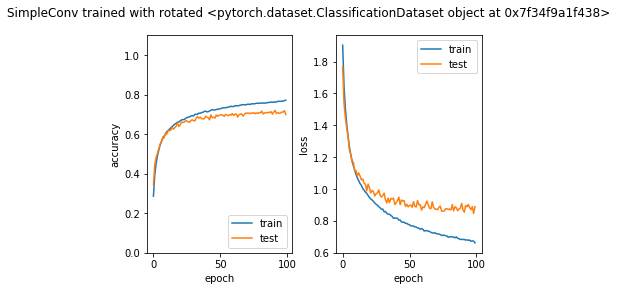

Testing both models on both datasets...


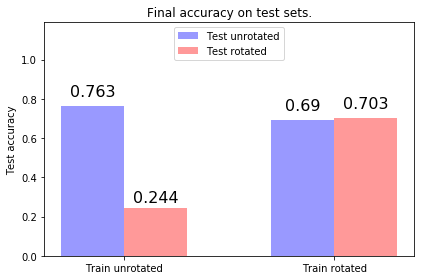

model_rotated_test_dataset score: loss=4.329793, accuracy=0.243700
model_rotated_train_dataset score: loss=4.263687, accuracy=0.245620
model_test_dataset score: loss=0.773279, accuracy=0.762700
model_train_dataset score: loss=0.250216, accuracy=0.915000
rotated_model_rotated_test_dataset score: loss=0.895269, accuracy=0.703400
rotated_model_rotated_train_dataset score: loss=0.706567, accuracy=0.754240
rotated_model_test_dataset score: loss=0.939010, accuracy=0.690400
rotated_model_train_dataset score: loss=0.747063, accuracy=0.744520


In [5]:
batch_size = 64

epochs={'cifar10':5,'mnist':2,'fashion_mnist':12,'cluttered_mnist':10,'lsa16':15,'mnist_rot':5,'pugeault':15}
from pytorch.experiment import rotation
rotated_epochs={'cifar10':100,'mnist':2,'fashion_mnist':60,'cluttered_mnist':30,'lsa16':100,'mnist_rot':5,'pugeault':40}

config=pytorch.experiment.rotation.TrainRotatedConfig(dataset_name=dataset,batch_size=batch_size,
                   epochs=epochs[dataset.name],rotated_epochs=rotated_epochs[dataset.name],
                   pre_rotated_epochs=0, optimizer=optimizer,rotated_optimizer=rotated_optimizer,
                  use_cuda=use_cuda)

scores=rotation.run(config,model,rotated_model,
                                        x_train,y_train,x_test,y_test,plot_accuracy=True,save_plots=False)
for k,v in scores.items():
    print('%s score: loss=%f, accuracy=%f' % (k,v[0],v[1]))


In [6]:
from pytorch.experiment import invariance_evaluation

n_rotations=16
#results=invariance_evaluation.run(model,dataset,config)
rotated_results,classes,rotations=invariance_evaluation.run(rotated_model,dataset,config,n_rotations)
results,classes,rotations=invariance_evaluation.run(model,dataset,config,n_rotations)




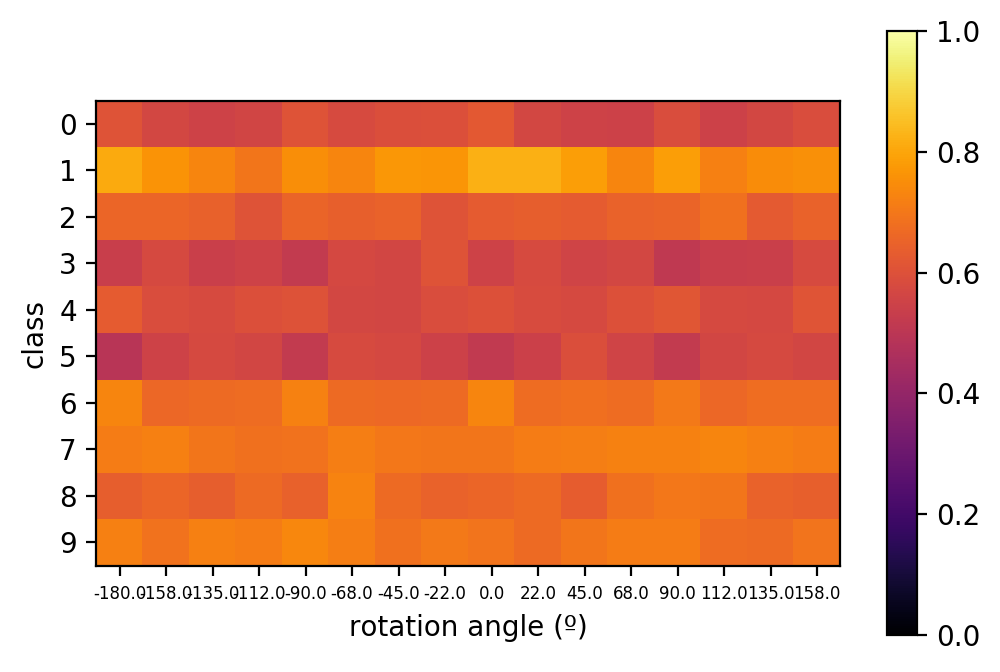

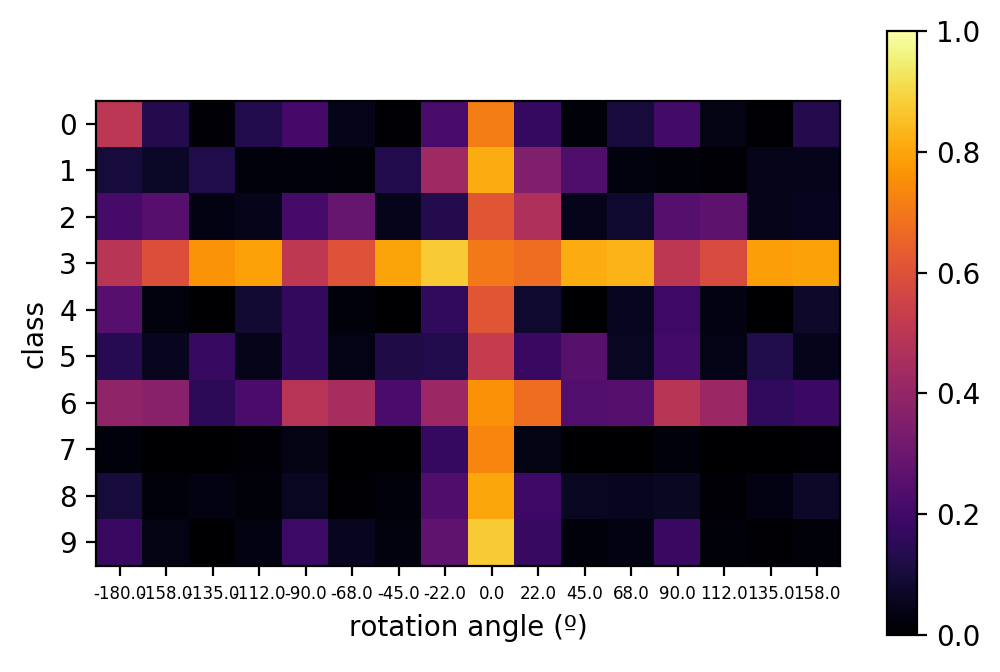

In [7]:
base_folder="plots/invariance_evaluation"
rotated_fig=invariance_evaluation.plot_results(rotated_results,classes,rotations)
name=f"{base_folder}/{dataset.name}_{model.name}_rotated.png"
rotated_fig.savefig(name)

fig=invariance_evaluation.plot_results(results,classes,rotations)
name=f"{base_folder}/{dataset.name}_{model.name}_unrotated.png"
fig.savefig(name)
